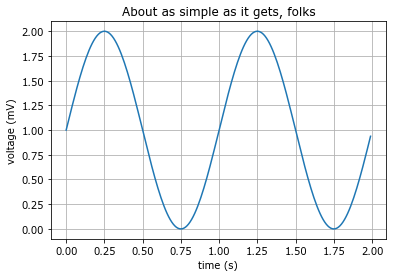

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

# Note that using plt.subplots below is equivalent to using
# fig = plt.figure and then ax = fig.add_subplot(111)
fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

fig.savefig("test.png")
plt.show()

In [29]:
#图片
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

path='/Users/yexianyong/Downloads/stinkbug.png'
img=mpimg.imread(path)
#数据说明：
#[ 0.40784314,  0.40784314,  0.40784314]这是一个像素点的rgb
"""
这是一排像素点
[[ 0.40784314,  0.40784314,  0.40784314],
        [ 0.40784314,  0.40784314,  0.40784314],
        [ 0.40784314,  0.40784314,  0.40784314],
        ..., 
        [ 0.42745098,  0.42745098,  0.42745098],
        [ 0.42745098,  0.42745098,  0.42745098],
        [ 0.42745098,  0.42745098,  0.42745098]],
"""
"""
这就是多排组成的图片了
[[[ 0.40784314,  0.40784314,  0.40784314],
        [ 0.40784314,  0.40784314,  0.40784314],
        [ 0.40784314,  0.40784314,  0.40784314],
        ..., 
        [ 0.42745098,  0.42745098,  0.42745098],
        [ 0.42745098,  0.42745098,  0.42745098],
        [ 0.42745098,  0.42745098,  0.42745098]],

       [[ 0.41176471,  0.41176471,  0.41176471],
        [ 0.41176471,  0.41176471,  0.41176471],
        [ 0.41176471,  0.41176471,  0.41176471],
        ..., 
"""
print(img[:1])

[[[ 0.40784314  0.40784314  0.40784314]
  [ 0.40784314  0.40784314  0.40784314]
  [ 0.40784314  0.40784314  0.40784314]
  ..., 
  [ 0.42745098  0.42745098  0.42745098]
  [ 0.42745098  0.42745098  0.42745098]
  [ 0.42745098  0.42745098  0.42745098]]]


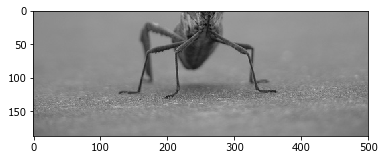

In [23]:
fig, ax = plt.subplots()
#显示下半部分
imgplot=plt.imshow(img[-int(len(img)*0.5):])
plt.show()